In [31]:
import numpy as np
import matplotlib.pylab as plt

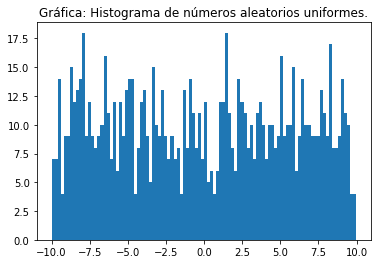

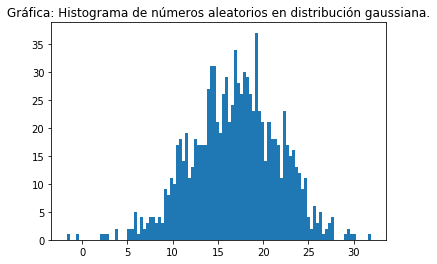

In [32]:
#Ejercicio 1.
#1a. Genere 1000 numeros aleatorios que sigan una distribucion uniforme y esten entre -10 y 10. Haga un histograma y guardelo sin mostrarlo en un archivo llamado uniforme.pdf.
numal = (20) * np.random.random(1000) - 10

plt.figure()
plt.hist(numal, bins=100)
plt.title(u"Gráfica: Histograma de números aleatorios uniformes.")
plt.savefig("uniforme.pdf")

#1b. Genere 1000 numeros aleatorios que sigan una distribucion gausiana centrada en 17 y de sigma 5. Haga un histograma y guardelo sin mostrarlo en un archivo llamado gausiana.pdf.
numgaus = np.random.normal(17,5,1000)

plt.figure()
plt.hist(numgaus, bins=100)
plt.title(u"Gráfica: Histograma de números aleatorios en distribución gaussiana.")
plt.savefig("gausiana.pdf")

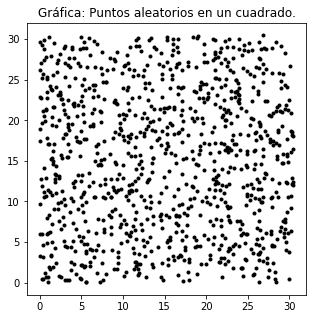

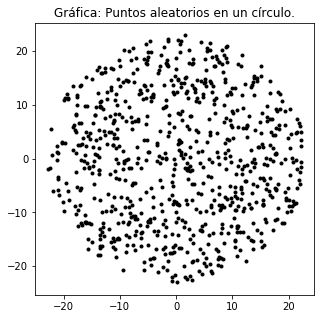

In [33]:
#Ejercicio 2.
#2a. Genere puntos aleatorios distribuidos uniformemente dentro de un cuadrado de lado 30.5. Grafique sus puntos y guarde la grafica sin mostrarla en un archivo llamado cuadrado.pdf. 
L1 = (30.5) * np.random.random(1000)
L2 = (30.5) * np.random.random(1000)

plt.figure(figsize=(5,5))
plt.scatter(L1,L2,color="black",marker='.')
plt.title(u"Gráfica: Puntos aleatorios en un cuadrado.")
plt.savefig("cuadrado.pdf")

#2b. Genere puntos aleatorios distribuidos uniformemente dentro de circulo de radio 23. Grafique sus puntos y guarde la grafica sin mostrarla en un archivo llamado circulo.pdf.
r = 23

P1 = (r*2) * np.random.random(1000) - 23
P2 = (r*2) * np.random.random(1000) - 23
P1p = []
P2p = []

for i in range(len(P1)):
    if(np.sqrt(P1[i]**2+P2[i]**2)<=r):
        P1p.append(P1[i])
        P2p.append(P2[i])

plt.figure(figsize=(5,5))
plt.scatter(P1p,P2p,color="black",marker='.')
plt.title(u"Gráfica: Puntos aleatorios en un círculo.")
plt.savefig("circulo.pdf")

In [34]:
#Ejercicio 4.
#Tome los puntos distribuidos aleatoriamente dentro del cuadrado y haga que cada punto siga una caminata aleatoria de 100 pasos. 
#La magnitud de los pasos de esta caminata debe seguir una distribucion gaussiana centrada en el punto y de sigma igual a 0.25.
#Implemente condiciones de frontera periodicas: si un punto se "sale" de cuadrado por un lado, "entra" por el otro.
def caminata(sigma):
    newL1 = []
    newL2 = []
    for i in range(0,1000):
        ale = np.random.random(100) * 100
        cL1 = [L1[i]]
        cL2 = [L2[i]]
        for i in range(0,100):
            numforpasosx = np.random.normal(L1[i],sigma,100)
            numforpasosy = np.random.normal(L2[i],sigma,100)
            if(ale[i]<25):
                #arriba
                cL1.append(cL1[i])
                cL2.append(cL2[i]+numforpasosy[i])
                if(cL2[i+1]>30.5):
                    cL2[i+1] = cL2[i+1] - 30.5
            if(ale[i]>=25 and ale[i]<=50):
                #abajo
                cL1.append(cL1[i])
                cL2.append(cL2[i]-numforpasosy[i])
                if(cL2[i+1]<0):
                    cL2[i+1] = 30.5 + cL2[i+1]
            if(ale[i]>50 and ale[i]<=75):
                #derecha
                cL1.append(cL1[i]+numforpasosx[i])
                cL2.append(cL2[i])
                if(cL1[i+1]>30.5):
                    cL1[i+1] = cL1[i+1] - 30.5
            if(ale[i]>75):
                #izquierda
                cL1.append(cL1[i]-numforpasosx[i])
                cL2.append(cL2[i])
                if(cL1[i+1]<0):
                    cL1[i+1] = 30.5 + cL1[i+1]
        newL1.append(cL1[100])
        newL2.append(cL2[100])
    return newL1,newL2,cL1,cL2

step1 = caminata(0.25)

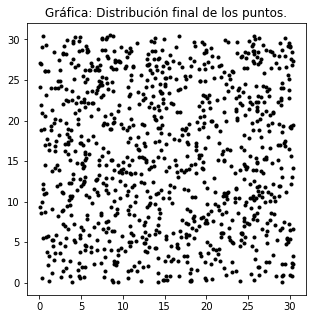

In [35]:
#Grafique la distribucion final de puntos y guarde dicha grafica sin mostrarla en un archivo llamado DistCaminata.pdf.
plt.figure(figsize=(5,5))
plt.scatter(step1[0],step1[1],color="black",marker='.')
plt.title(u"Gráfica: Distribución final de los puntos.")
plt.savefig("DistCaminata.pdf")

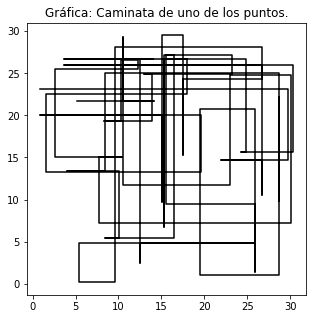

In [36]:
#Grafique la caminata de UNO de sus puntos y guarde dicha grafica sin mostrarla en un archivo llamado puntoCaminata.pdf.
plt.figure(figsize=(5,5))
plt.plot(step1[2],step1[3],color="black")
plt.title(u"Gráfica: Caminata de uno de los puntos.")
plt.savefig("puntoCaminata.pdf")

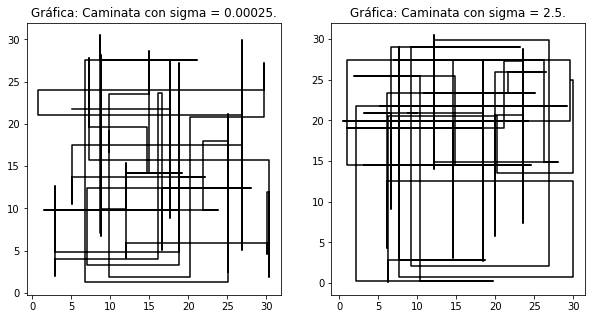

In [38]:
#Repita el proceso para sigma = 0.00025 y sigma= 2.5. Grafique la caminata de UNO de sus puntos para los distintos sigmas y guardela sin mostrarla en sigmaCaminata.pdf.
step2 = caminata(0.00025)
step3 = caminata(2.5)

fig = plt.figure(figsize=(10,5))

a = fig.add_subplot(1,2,1)
a.plot(step2[2],step2[3],color="black")
a.set_title(u"Gráfica: Caminata con sigma = 0.00025.")

b = fig.add_subplot(1,2,2)
b.plot(step3[2],step3[3],color="black")
b.set_title(u"Gráfica: Caminata con sigma = 2.5.")

plt.savefig("sigmaCaminata.pdf")